In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt


In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


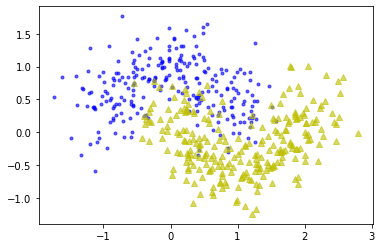

In [3]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'b.', alpha=0.6)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'y^', alpha=0.6)
plt.show()


### 硬投票

In [4]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression(random_state=42)
ran_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
vote = VotingClassifier(
    [('lr', log_clf), ('rf', ran_clf), ('sf', svm_clf)], voting='hard')


In [5]:
# 查看准确率
from sklearn.metrics import accuracy_score
for clf in (log_clf, ran_clf, svm_clf, vote):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(clf.__class__.__name__, ':', accuracy_score(y_test, y_predict))
'''
LogisticRegression : 0.864
RandomForestClassifier : 0.88
SVC : 0.896
VotingClassifier : 0.904
'''


LogisticRegression : 0.864
RandomForestClassifier : 0.896
SVC : 0.896
VotingClassifier : 0.912


'\nLogisticRegression : 0.864\nRandomForestClassifier : 0.88\nSVC : 0.896\nVotingClassifier : 0.904\n'

### 软投票

In [6]:
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(random_state=42)
ran_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
vote = VotingClassifier(
    [('lr', log_clf), ('rf', ran_clf), ('sf', svm_clf)], voting='soft')

for clf in (log_clf, ran_clf, svm_clf, vote):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(clf.__class__.__name__, ':', accuracy_score(y_test, y_predict))

'''
LogisticRegression : 0.864
RandomForestClassifier : 0.896
SVC : 0.896
VotingClassifier : 0.92
'''


LogisticRegression : 0.864
RandomForestClassifier : 0.896
SVC : 0.896
VotingClassifier : 0.92


'\nLogisticRegression : 0.864\nRandomForestClassifier : 0.896\nSVC : 0.896\nVotingClassifier : 0.92\n'

### Bagging

对比决策树和Bagging

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


def compare_bag_tree():
    bag_clf = BaggingClassifier(DecisionTreeClassifier(
    ), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(X_train, y_train)
    y_pred_bag = bag_clf.predict(X_test)

    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X_test)
    return accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_tree)


In [8]:
compare_bag_tree()
# (0.904, 0.856)  bag/tree

bag_clf = BaggingClassifier(DecisionTreeClassifier(
), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

matplot颜色博客
https://blog.csdn.net/zhaogeng111/article/details/78419015?spm=1001.2014.3001.5501

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)

    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pre = clf.predict(X_new).reshape(x1.shape)

    if contour:
        custom_cmap2 = ListedColormap(['#FFB6C1', '#4B0082', '#A0522D'])
        plt.contourf(x1, x2, y_pre, cmap=custom_cmap2, alpha=0.5)

    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'b.')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r^')
    plt.axis(axes)


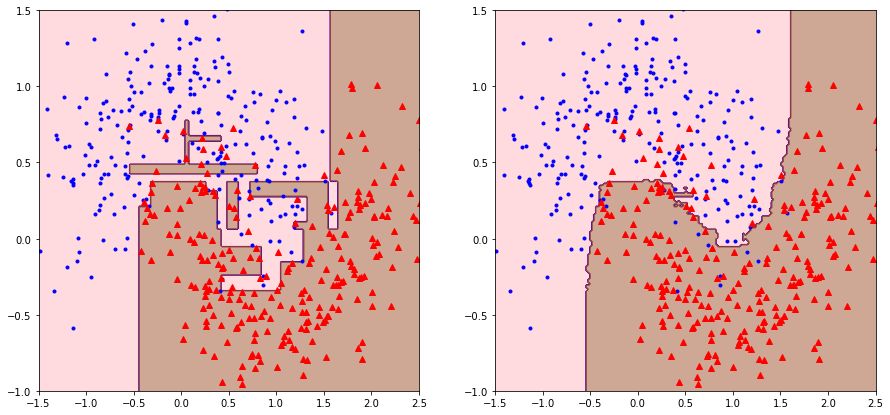

In [10]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.show()


In [11]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_
y_pre = bag_clf.predict(X_test)
accuracy_score(y_test, y_pre)


0.904

In [12]:
# 打印所有验证结果
bag_clf.oob_decision_function_


array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

In [13]:
# 展示特征重要性
from sklearn.datasets import load_iris
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.09465983493230001
sepal width (cm) 0.024171950555112582
petal length (cm) 0.4549475958295382
petal width (cm) 0.42622061868304933


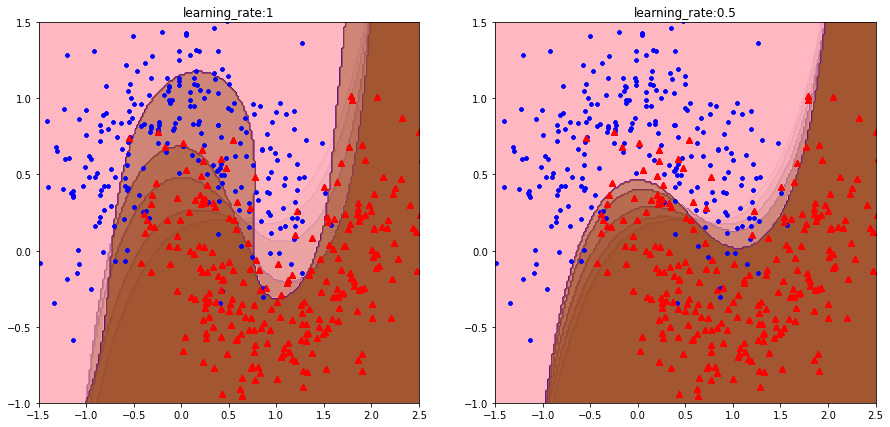

In [14]:
m = len(X_train)
plt.figure(figsize=(15, 7))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    # 初始化所有权重
    sample_weights = np.ones(m)

    plt.subplot(subplot)
    
    #迭代样本权重
    for i in range(5):
        svm_clf = SVC(kernel='rbf', C=0.05, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        
        y_pre = svm_clf.predict(X_train)
        
        sample_weights[y_pre!=y_train] *= (1+learning_rate)
        
        plot_decision_boundary(svm_clf,X,y,alpha=0.2)
        plt.title(f'learning_rate:{learning_rate}')
plt.show()


In [15]:
from sklearn.ensemble import  AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 200,#n轮
    learning_rate = 0.5,
    random_state =42
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

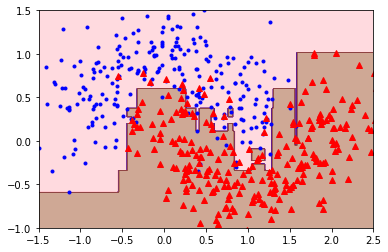

In [16]:
plot_decision_boundary(ada_clf,X,y)
plt.show()

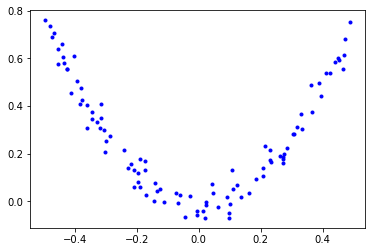

In [17]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2+0.05*np.random.randn(100)
plt.plot(X,y,'b.')
plt.show()

In [18]:

#第一次预测
from sklearn.tree import  DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X,y)


y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(X,y2)


y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=3)

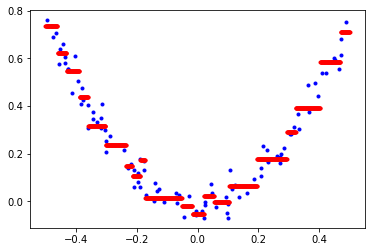

In [19]:
plt.plot(X,y,'b.')

X_new = np.linspace(-0.5,0.5,1000).reshape(-1,1)
y_pre = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

plt.plot(X_new,y_pre,'r.')
plt.show()

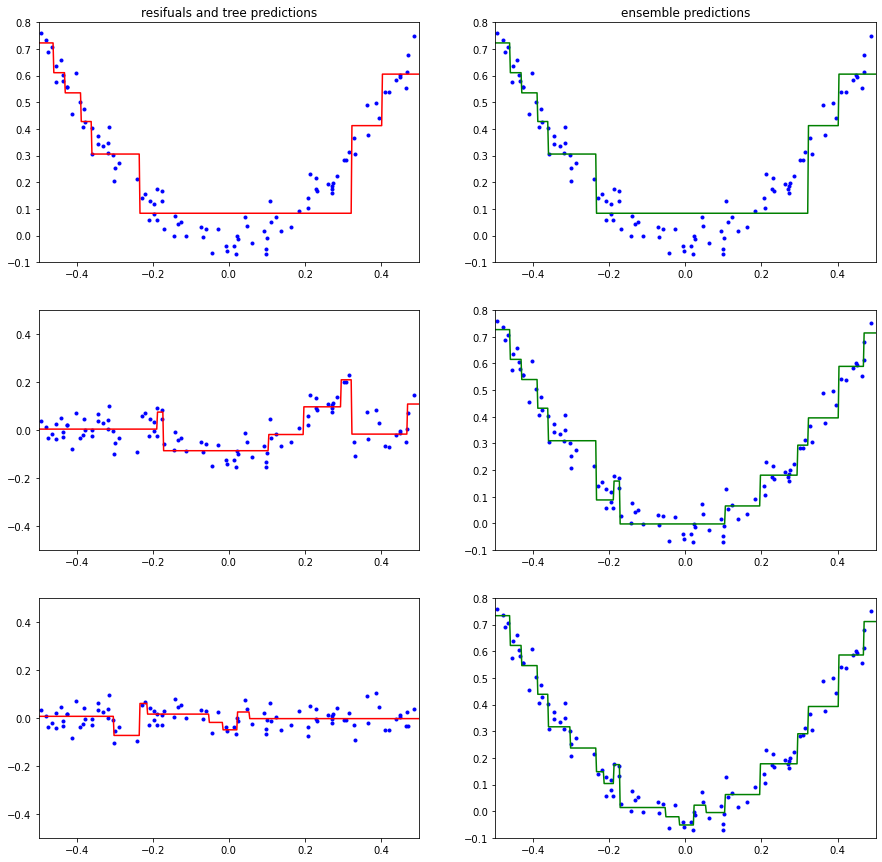

In [20]:
def plot_predictions(regs, X , y , style='r-',axes=[-0.5,0.5,-0.1,0.8]):
    x1 =np.linspace(axes[0],axes[1],500)
    y_pre = sum(reg.predict(x1.reshape(-1,1)) for reg in regs)
    plt.plot(X[:,0],y,'b.')
    plt.plot(x1,y_pre,style)
    plt.axis(axes)
    
plt.figure(figsize=(15,15))

plt.subplot(321)
plt.title('resifuals and tree predictions')
plot_predictions([tree_reg1],X,y)
plt.subplot(322)
plt.title('ensemble predictions')
plot_predictions([tree_reg1],X,y,'g-')

plt.subplot(323)
plot_predictions([tree_reg2],X,y2,axes=[-0.5,0.5,-0.5,0.5])
plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2],X,y,'g-')

plt.subplot(325)
plot_predictions([tree_reg3],X,y3,axes=[-0.5,0.5,-0.5,0.5])
plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3],X,y,'g-')
plt.show()

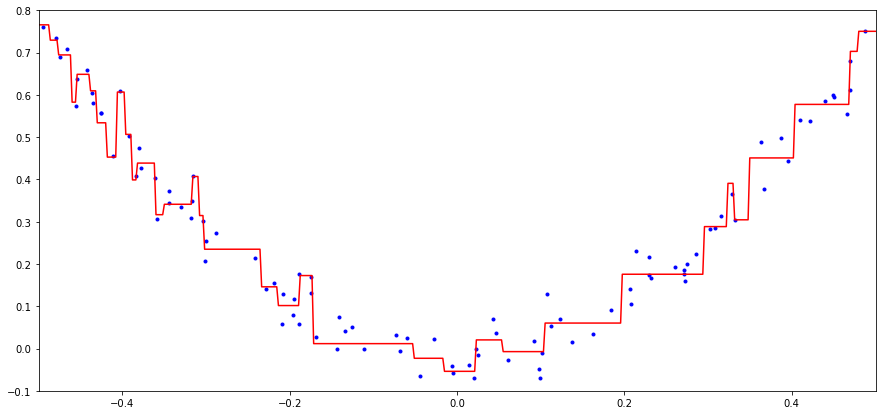

In [21]:

np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2+0.05*np.random.randn(100)
tree_list=[]

tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X,y)
y_new = y - tree_reg1.predict(X)
tree_list.append(tree_reg1)

for i in range(5):
    tree_reg = DecisionTreeRegressor(max_depth=3)
    tree_reg.fit(X,y_new)
    tree_list.append(tree_reg)
    y_new = y_new - tree_reg.predict(X)
    
plt.figure(figsize=(15,7))
plot_predictions(tree_list,X,y)
plt.show()

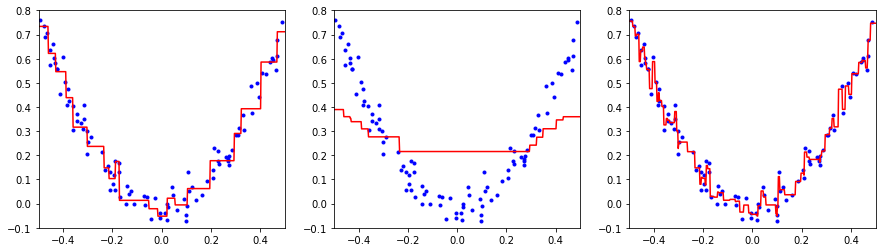

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt1 = GradientBoostingRegressor(
    max_depth = 3,
    n_estimators = 3,
    learning_rate = 1.0,
    random_state = 41
)

gbrt2 = GradientBoostingRegressor(
    max_depth = 3,
    n_estimators = 3,
    learning_rate = 0.1,
    random_state = 41
)

gbrt3 = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators = 300,
    learning_rate = 0.1,
    random_state = 41
)
gbrt1.fit(X,y)
gbrt2.fit(X,y)
gbrt3.fit(X,y)
plt.figure(figsize=(15,4))

plt.subplot(131)
plot_predictions([gbrt1],X,y)
plt.subplot(132)
plot_predictions([gbrt2],X,y)
plt.subplot(133)
plot_predictions([gbrt3],X,y)
plt.show()

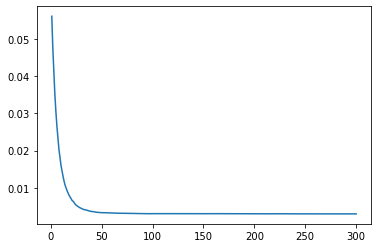

275 0.0029677860162253293


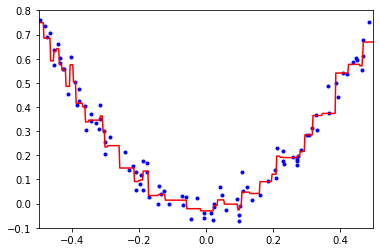

In [51]:
from sklearn.metrics import  mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
gbrt = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators = 300,
    random_state = 42
)
gbrt.fit(X_train,y_train)
errors =  [mean_squared_error(y_test,y_pre) for y_pre in gbrt.staged_predict(X_test)]
plt.plot(range(1,301),errors)
plt.show()
best_n_estimators = np.argmin(errors)
print(best_n_estimators,np.min(errors))

#重新训练

gbrt_best = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators = 117,
    random_state = 42
)
gbrt_best.fit(X_train,y_train)
plot_predictions([gbrt_best],X,y)

In [62]:
gbrt = GradientBoostingRegressor(
    max_depth = 2,
    warm_start=True,
    random_state = 42
)

min_val_error = float('inf')
#连续下降的次数
error_going_up = 0

for n_estimators in range(1,300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pre = gbrt.predict(X_test)
    test_errors = mean_squared_error(y_test,y_pre)
    if test_errors < min_val_error:
        min_val_error = test_errors
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up == 5:
            break
print(min_val_error)

0.003023701609089896
